## Addressing class imbalance


E-commerce Data Balancing:


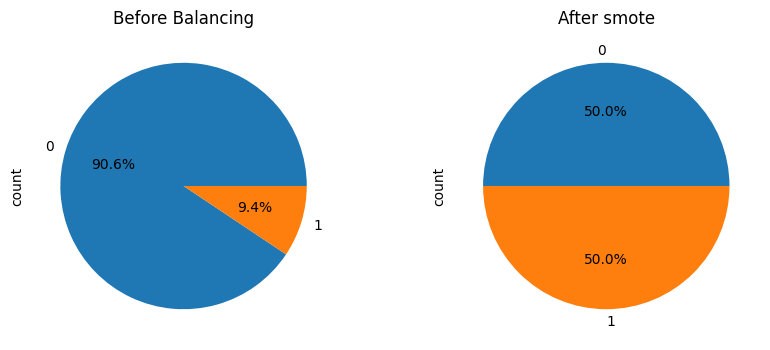


Credit Card Data Balancing:


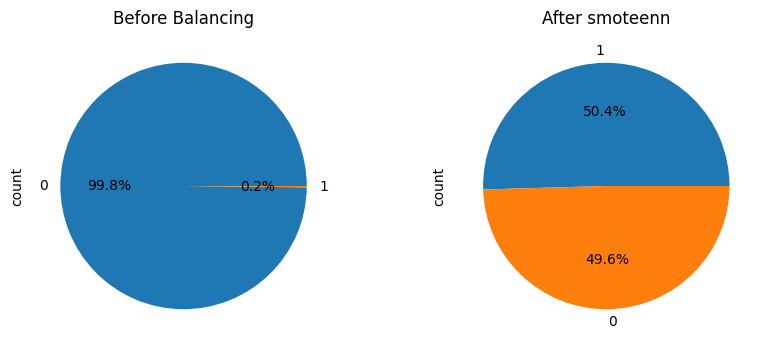


Balancing complete! Ready for model training.
E-commerce shapes - Train: (219136, 4), Test: (30223, 4)
Credit shapes - Train: (440390, 30), Test: (56962, 30)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# 1. Load and Prepare Data
def load_and_prepare_data():
    # Load datasets
    fraud_data = pd.read_csv('../data/Fraud_Data.csv', parse_dates=['signup_time', 'purchase_time'])
    ip_country = pd.read_csv('../data/IpAddress_to_Country.csv')
    credit_data = pd.read_csv('../data/creditcard.csv.zip')
    
    # Clean e-commerce data
    fraud_data_clean = fraud_data.dropna().drop_duplicates()
    
    # Feature engineering for e-commerce data
    fraud_data_fe = fraud_data_clean.copy()
    fraud_data_fe['time_since_signup'] = (fraud_data_fe['purchase_time'] - fraud_data_fe['signup_time']).dt.total_seconds() / 3600
    fraud_data_fe['hour_of_day'] = fraud_data_fe['purchase_time'].dt.hour
    fraud_data_fe['day_of_week'] = fraud_data_fe['purchase_time'].dt.dayofweek
    
    # Clean credit card data
    credit_data_clean = credit_data.copy()
    credit_data_clean['Amount'] = np.log1p(credit_data_clean['Amount'])  # Log transform
    
    return fraud_data_fe, credit_data_clean

# 2. Class Imbalance Handling
def handle_class_imbalance(X, y, method='smote'):
    """
    Handle class imbalance using specified method:
    - 'smote': Synthetic Minority Oversampling
    - 'undersample': Random undersampling
    - 'smoteenn': Combined SMOTE + Edited Nearest Neighbors
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    if method == 'smote':
        sampler = SMOTE(random_state=42)
    elif method == 'undersample':
        sampler = RandomUnderSampler(random_state=42)
    elif method == 'smoteenn':
        sampler = SMOTEENN(random_state=42)
    else:
        raise ValueError("Invalid method. Choose 'smote', 'undersample', or 'smoteenn'")
    
    X_res, y_res = sampler.fit_resample(X_train, y_train)
    
    # Plot class distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    y_train.value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Before Balancing')
    
    plt.subplot(1, 2, 2)
    pd.Series(y_res).value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'After {method}')
    plt.show()
    
    return X_res, X_test, y_res, y_test

# 3. Main Execution
if __name__ == "__main__":
    # Load and prepare data
    fraud_data_fe, credit_data_clean = load_and_prepare_data()
    
    # Prepare e-commerce features
    X_ecom = fraud_data_fe[['purchase_value', 'time_since_signup', 'hour_of_day', 'day_of_week']]
    y_ecom = fraud_data_fe['class']
    
    # Prepare credit card features
    X_credit = credit_data_clean.drop('Class', axis=1)
    y_credit = credit_data_clean['Class']
    
    # Handle imbalance for e-commerce data
    print("E-commerce Data Balancing:")
    X_ecom_res, X_ecom_test, y_ecom_res, y_ecom_test = handle_class_imbalance(
        X_ecom, y_ecom, method='smote')
    
    # Handle imbalance for credit card data
    print("\nCredit Card Data Balancing:")
    X_credit_res, X_credit_test, y_credit_res, y_credit_test = handle_class_imbalance(
        X_credit, y_credit, method='smoteenn')
    
    print("\nBalancing complete! Ready for model training.")
    print(f"E-commerce shapes - Train: {X_ecom_res.shape}, Test: {X_ecom_test.shape}")
    print(f"Credit shapes - Train: {X_credit_res.shape}, Test: {X_credit_test.shape}")